In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D

In [22]:
X,Y=make_circles(n_samples=500,noise=0.02)

In [23]:
print(X.shape,Y.shape)

(500, 2) (500,)


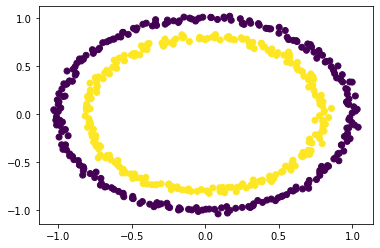

In [24]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [25]:
def phi(X):
    """Non Linear Transformation"""
    X1=X[:,0]
    X2=X[:,1]
    X3=X1**2+X2**2
    
    X_=np.zeros((X.shape[0],3))
    print(X_.shape)
    
    X_[:,:-1]=X
    X_[:,-1]=X3
    
    return X_

In [26]:
X_=phi(X)

(500, 3)


In [27]:
print(X_[:3,:])

[[ 0.79228998  0.10452952  0.63864983]
 [ 0.38138413  0.73552779  0.68645499]
 [ 0.7905467  -0.54484388  0.92181894]]


In [48]:
def plot3d(X,show=True):
    fig=plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111,projection='3d')
    X1=X[:,0]
    X2=X[:,1]
    X3=X[:,2]
    ax.scatter(X1,X2,X3,zdir='Z',s=20,c=Y,depthshade=True)
    if(show==True):
        plt.show()
    return ax

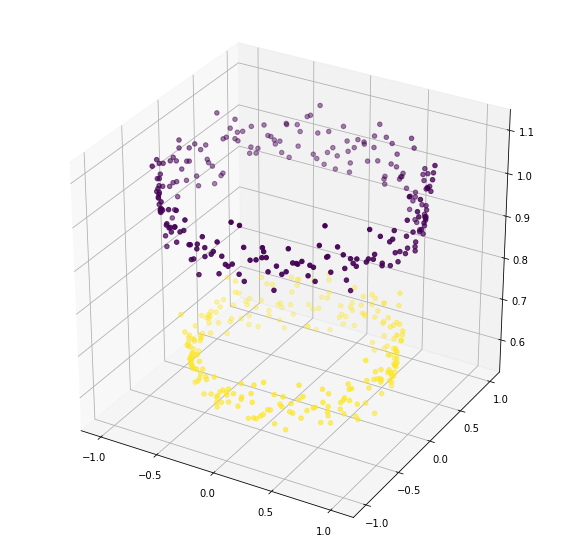

In [29]:
plot3d(X_)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [31]:
lr=LogisticRegression()

# Logestic Regression

In [32]:
acc=cross_val_score(lr,X,Y,cv=5).mean()
print('Accuracy X(2D) is %.4f'%(acc*100))

Accuracy X(2D) is 44.4000


In [34]:
acc=cross_val_score(lr,X_,Y,cv=5).mean()
print('Accuracy X(2D) is %.4f'%(acc*100))

Accuracy X(2D) is 100.0000


# Visulise the decision Surface

In [35]:
lr.fit(X_,Y)

LogisticRegression()

In [39]:
wts=lr.coef_

In [40]:
bias=lr.intercept_

In [41]:
xx,yy=np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [42]:
z=-(wts[0,0]*xx + wts[0,1]*yy +bias)/wts[0,2]

In [43]:
print(z)

[[0.83007521 0.82651508 0.82295494 0.81939481]
 [0.82822699 0.82466685 0.82110672 0.81754658]
 [0.82637876 0.82281863 0.81925849 0.81569836]
 [0.82453054 0.8209704  0.81741027 0.81385013]]


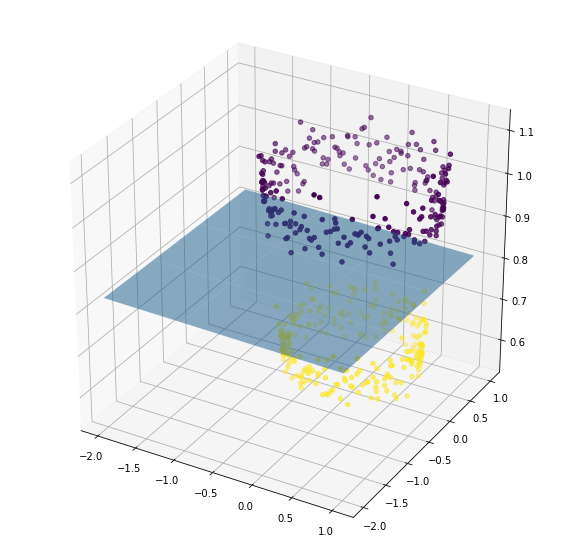

In [53]:
ax=plot3d(X_,False)
ax.plot_surface(xx,yy,z,alpha=0.5)